In [29]:
#Loading in required packages
import pandas as pd
import numpy as np
import sys
import statistics

In [6]:
import matplotlib.pyplot as plt

In [10]:
#Loading in the fully cleaned corpus and validation metrics
sys.path.insert(1, '/Users/Cylita/Desktop/insight-ds-project_news-link/data/processed')

val_metrics = pd.read_csv('/Users/Cylita/Desktop/insight-ds-project_news-link/data/processed/validation_metrics.csv')
news_corpus = pd.read_csv('/Users/Cylita/Desktop/insight-ds-project_news-link/data/processed/Final_Cleaned_Corpus.csv')

In [66]:
#Rounding the value metrics as two have near perfect similarity (i.e. the inserted link has a cosine similarity of 1)
rounded_metrics = round(val_metrics, 3)

In [25]:
#Separating out fully cleaned stories
stories = news_corpus['cleaned_text']

In [26]:
#Calculating length of stories and storing in a list
story_length = []

for story in stories:
    forcount = len(story.split())
    story_length.append(forcount)
    


In [32]:
#Calculating some important statistics for the above distribtion
#Highly skewed so using mode
story_mode = statistics.mode(story_length)
story_median = statistics.median(story_length)

In [94]:
#Calculating the value for the 90th percentile
length_array = np.array(story_length)
percentile_90 = np.percentile(length_array, 90) # return 90th percentile
percentile_85 = np.percentile(length_array, 85) #return the 80th percentile

In [46]:
print(percentile_80)


488.0


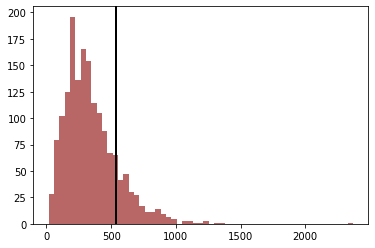

In [95]:
# create a figure and axis
fig, storyhist = plt.subplots()
plt.hist(story_length, bins='auto', alpha=0.6, color="darkred")

plt.rc('lines', linewidth=2, color='black')
plt.axvline(x = percentile_85)

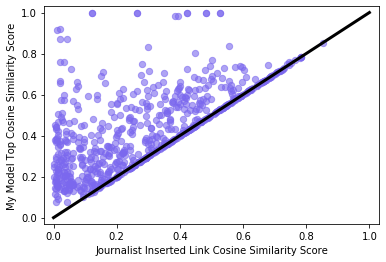

In [89]:
# create a figure and axis
fig, ax = plt.subplots()

x= rounded_metrics['JournalScore']
y= rounded_metrics['JournalScore']
#scatter my similarity scores against the similarity scores for journal articles
ax.scatter(rounded_metrics['JournalScore'], rounded_metrics['MyModel'], 
           c='mediumslateblue', alpha = 0.6, s=40)
#Setting x and y limits
plt.xlim(-0.03, 1.03)
plt.ylim(-0.03, 1.03)
ax.set_xlabel('Journalist Inserted Link Cosine Similarity Score')
ax.set_ylabel('My Model Top Cosine Similarity Score')

plt.plot([0, 1.0], [0, 1.0], color='black', linestyle='-', linewidth=3)
plt.show()
